<a href="https://colab.research.google.com/github/DaveLoay/AP_TAREA_1/blob/main/AP_T1_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Ex.1
#Red de unidades de umbral lineal

Programa y evalúa una red de neuronas con funciones de activación escalón unitario que aproxime la operación XNOR (⊙) dada por

| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |1|
|0 |1 |0|
|1 |0 |0|
|1 |1 |1|

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Definiendo la función de activación del escalón unitario

In [ ]:
def unit_step(Z):
  return np.heaviside(Z,1)

Podemos ver la operación XNOR como una tarea de clasificación binaria a partir de 2 entradas. Por lo tanto, usaremos la función de pérdida de entropía cruzada binaria:

$$
ECB(\mathbf{y}, \mathbf{\hat{y}})  = -\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

In [ ]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

Asimismo, calcularemos la exactitud para medir el rendimiento del modelo aprendido por la red neuronal densa:

$$
exactitud = \frac{correctos}{total}
$$

In [ ]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

Ahora, definimos la función que propaga hacia adelante una entrada $\mathbf{x}^{i}$ (forward propagation). Como la red está compuesta de 2 capas densas (1 oculta y 1 de salida), tenemos 2 matrices de pesos con sus correspondientes vectores de sesgos $\{\mathbf{W}^{\{1\}}, \mathbf{b}^{\{1\}}\}$ y $\{\mathbf{W}^{\{2\}}, \mathbf{b}^{\{2\}}\}$ de la capa oculta y la capa de salida respectivamente. Así, podemos llevar a cabo la propagación hacia adelante en esta red de la siguiente manera:

$$
	\begin{split}
				\mathbf{a}^{\{1\}} & =  \mathbf{x}^{(i)} \\
				\mathbf{z}^{\{2\}} & =  \mathbf{W}^{\{1\}} \cdot \mathbf{a}^{\{1\}} + \mathbf{b}^{\{1\}}\\
				\mathbf{a}^{\{2\}} & =  \sigma(\mathbf{z}^{\{2\}}) \\
				\mathbf{z}^{\{3\}} & =  \mathbf{W}^{\{2\}} \cdot \mathbf{a}^{\{2\}}  + \mathbf{b}^{\{2\}}\\
				\mathbf{a}^{\{3\}} & =  \sigma(\mathbf{z}^{\{3\}})\\
				\hat{y}^{(i)} & =  \mathbf{a}^{\{3\}}
			\end{split}
      $$

In [ ]:
def forward_prop(x, W1, b1, W2, b2):
    z2 = np.dot(W1.T, x[:, np.newaxis]) + b1
    a2 = unit_step(z2)
    z3 = np.dot(W2.T, a2) + b2
    y_hat = unit_step(z3)
    return z2, a2, z3, y_hat

Finalmente, definimos la función para entrenar nuestra red neuronal usando descenso por gradiente. Para calcular el gradiente de la función de pérdida respecto a los pesos y sesgos en cada capa empleamos el algoritmo de retropropagación.

In [ ]:
def retropropagacion(X, y, alpha = 0.01, n_epocas = 100, n_ocultas = 10):
    n_ejemplos = X.shape[0]
    n_entradas = X.shape[1]
        
    # Inicialización de las matrices de pesos W y V
    W1 = np.sqrt(1.0 / n_entradas) * np.random.randn(n_entradas, n_ocultas)
    b1 = np.zeros((n_ocultas, 1))
    
    W2 = np.sqrt(1.0 / n_ocultas) * np.random.randn(n_ocultas, 1)
    b2 = np.zeros((1, 1))
    
    perdidas = np.zeros((n_epocas))
    exactitudes = np.zeros((n_epocas))
    y_predicha = np.zeros((y.shape))
    for i in range(n_epocas):
        for j in range(n_ejemplos):
            z2, a2, z3, y_hat = forward_prop(X[j], W1, b1, W2, b2)

            # cálculo de gradientes para W2 y b2 por retropropagación
            dz3 = y_hat - y[j]
            dW2 = np.outer(a2, dz3)
            db2 = dz3

            # cálculo de gradientes para W1 y b1 por retropropagación
            dz2 = np.dot(W2, dz3) * (1)   ## ********** Aquí va la derivada de la función de activación
            dW1 = np.outer(X[j], dz2)
            db1 = dz2
            
            ####################################
            # IMPORTANTE 
            # la actualización de los parámetros
            # debe hacerse de forma simultánea
            W2 = W2 - alpha * dW2
            b2 = b2 - alpha * db2
            W1 = W1 - alpha * dW1
            b1 = b1 - alpha * db1

            y_predicha[j] = y_hat
            
        # calcula la pérdida en la época
        perdidas[i] = entropia_cruzada_binaria(y, y_predicha)
        exactitudes[i] = exactitud(y, np.round(y_predicha))
        print('Epoch {0}: Pérdida = {1} Exactitud = {2}'.format(i, 
                                                              perdidas[i], 
                                                              exactitudes[i]))

    return W1, W2, perdidas, exactitudes

Para probar nuestra red, generamos los ejemplos correspondientes a la operación 
XNOR.


In [ ]:
# ejemplo (XNOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0, 0, 1]]).T

#Finalmente, entrenamos nuestra red. 
\\
En esta sección se jugó con los hiper parámetros de la red, de tal foram que se logró entrenar a la red en 15 épocas con una tasa de aprendizaje $α$ = 0.05 y una capa oculta de 10 neuronas.

In [ ]:
np.random.seed(0)
W1, W2, perdidas, exactitudes = retropropagacion(X, 
                                                 y, 
                                                 alpha = 0.05, 
                                                 n_epocas = 15,
                                                 n_ocultas = 10)

Epoch 0: Pérdida = 817.9136730607354 Exactitud = 25.0
Epoch 1: Pérdida = 781.1768724910584 Exactitud = 50.0
Epoch 2: Pérdida = 1525.6169444124396 Exactitud = 25.0
Epoch 3: Pérdida = 781.1768724910584 Exactitud = 50.0
Epoch 4: Pérdida = 36.7368005696771 Exactitud = 75.0
Epoch 5: Pérdida = 744.4400719213812 Exactitud = 75.0
Epoch 6: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 7: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 8: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 9: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 10: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 11: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 12: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 13: Pérdida = 2.220446049250313e-16 Exactitud = 100.0
Epoch 14: Pérdida = 2.220446049250313e-16 Exactitud = 100.0


**Graficamos** el valor de la pérdida y la exactitud en cada época para ver el comportamiento de nuestra red durante el entrenamiento:

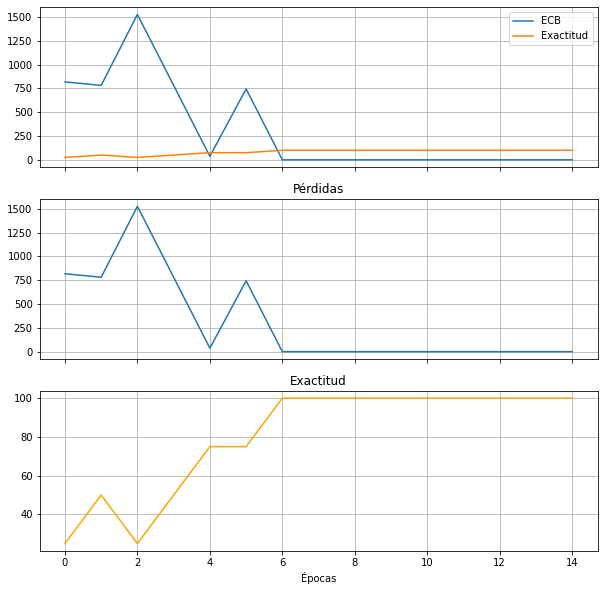

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize= (10,10))
ax1.plot(np.arange(perdidas.size), perdidas, label='ECB')
ax1.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
ax1.legend()
ax1.grid(True)
ax2.plot(perdidas, label = 'ECB')
ax2.grid(True)
ax2.set_title('Pérdidas')
ax3.plot(exactitudes, color = 'orange')
ax3.grid(True)
ax3.set_xlabel('Épocas')
ax3.set_title('Exactitud')

plt.show()